In [1]:
#IMPORTING LIBRARIES 
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

***LOADING DATASET***

In [4]:
df=pd.read_csv("V:/Unemployment_in_India.csv")

***EXPLORING DATA***

In [5]:
print('Shape of the dataset : ',df.shape)

Shape of the dataset :  (768, 7)


In [6]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [7]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),740.0,1.178795e+01,1.072130e+01,0.00,4.657500e+00,8.35,1.588750e+01,76.74
Estimated Employed,740.0,7.204460e+06,8.087988e+06,49420.00,1.190404e+06,4744178.50,1.127549e+07,45777509.00
Estimated Labour Participation Rate (%),740.0,4.263012e+01,8.111094e+00,13.33,3.806250e+01,41.16,4.550500e+01,72.57


In [10]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

No null values present in the dataset

In [11]:
df.columns=df.columns.str.strip()
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
import datetime as dt

In [14]:
df['year']=df['Date'].dt.isocalendar().year
df['month']=df['Date'].dt.month

In [15]:
df=df.dropna()

In [16]:
df.shape

(740, 9)

In [17]:
df['Frequency'].unique()

df=df.drop(['Frequency'],axis=1)

In [18]:
df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,year,month
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,2019,5.0
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,2019,6.0
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,2019,7.0
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,2019,8.0
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,2019,9.0


***EDA***

<AxesSubplot:>

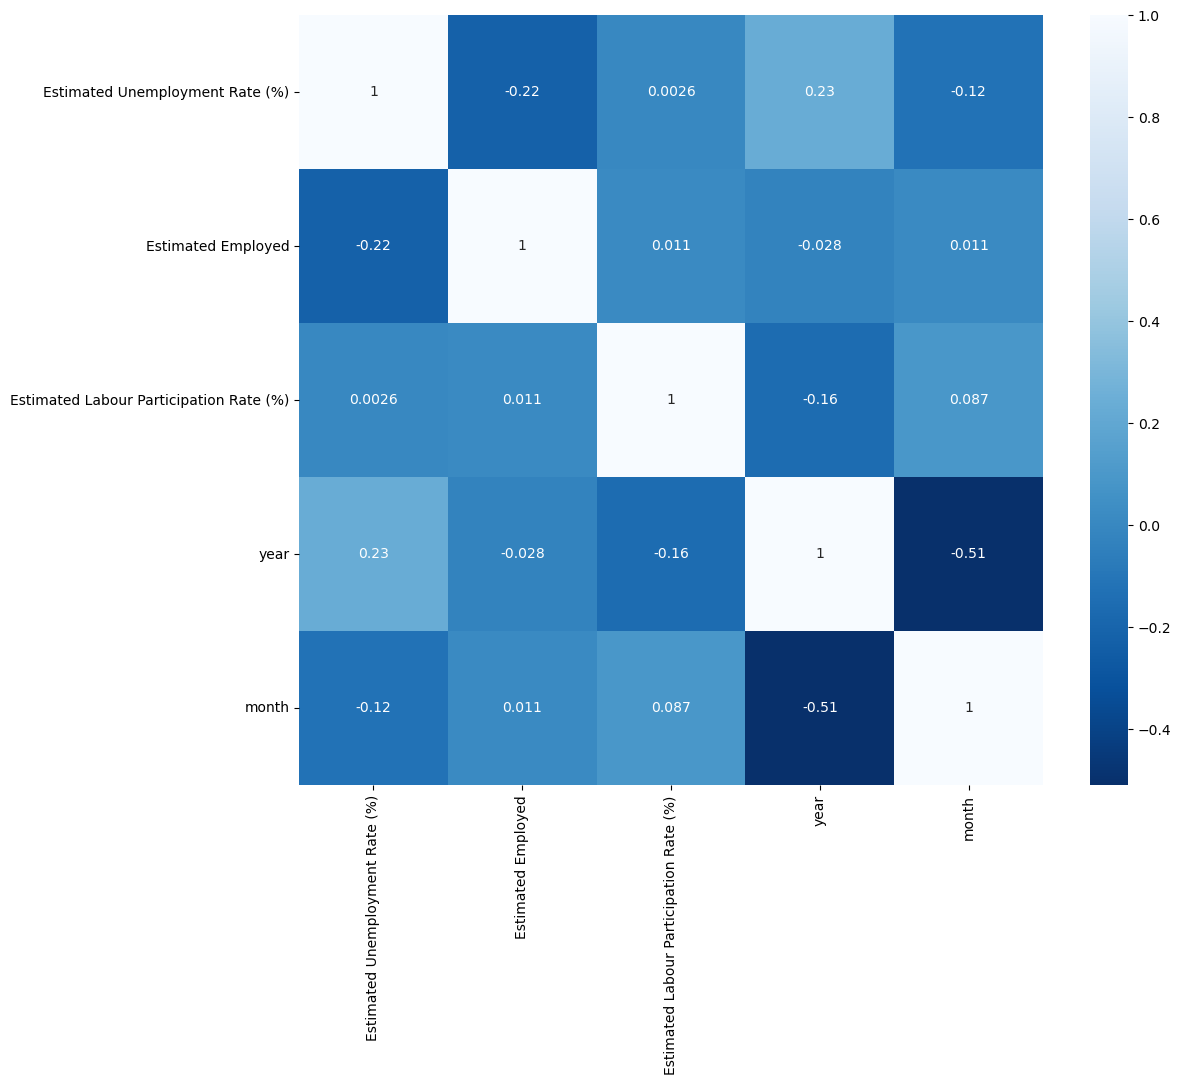

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues_r')

Unemployment rate by Area

In [20]:
count_by_area=df['Area'].value_counts().rename_axis('Area').reset_index(name='Count')
count_by_area.sort_values(by='Count',ascending=False)

,Area,Count
0,Urban,381
1,Rural,359


<AxesSubplot:xlabel='Area', ylabel='count'>

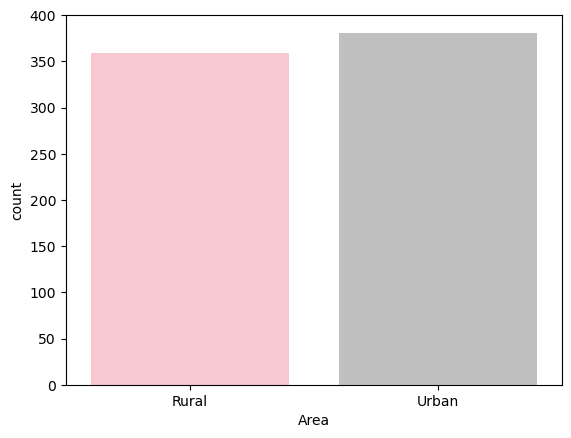

In [21]:
sns.countplot(x='Area',data=df,palette=['pink','silver'])

Unemployment rate by state

<Axes: xlabel='count', ylabel='Region'>

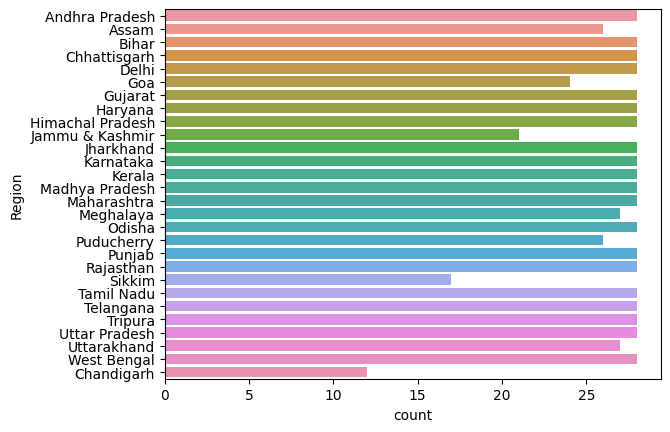

In [ ]:
sns.countplot(y='Region',data=df)

<Axes: title={'center': 'Unemployment Rate based on Area'}, xlabel='Estimated Unemployment Rate (%)', ylabel='Region'>

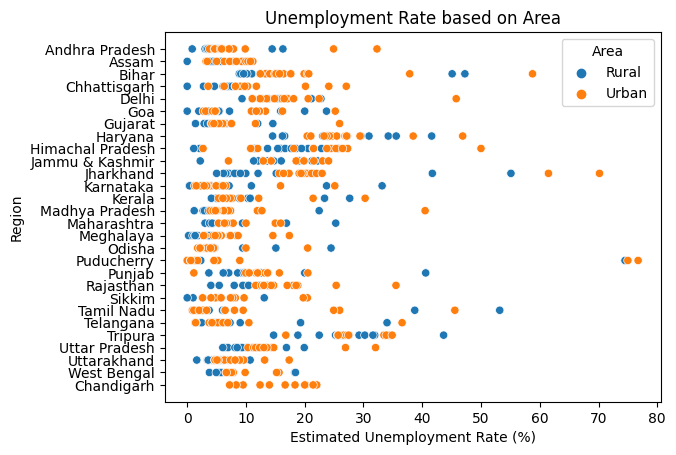

In [ ]:
plt.title('Unemployment Rate based on Area')
sns.scatterplot(y=df['Region'],x=df['Estimated Unemployment Rate (%)'],hue=df['Area'])

States with High Unemployment Rate

In [ ]:
df[df['Estimated Unemployment Rate (%)']>50].Region.value_counts()

Jharkhand     3
Puducherry    3
Tamil Nadu    1
Bihar         1
Name: Region, dtype: int64

<Axes: title={'center': 'States with High Unemployment Rate'}, xlabel='Estimated Unemployment Rate (%)', ylabel='Region'>

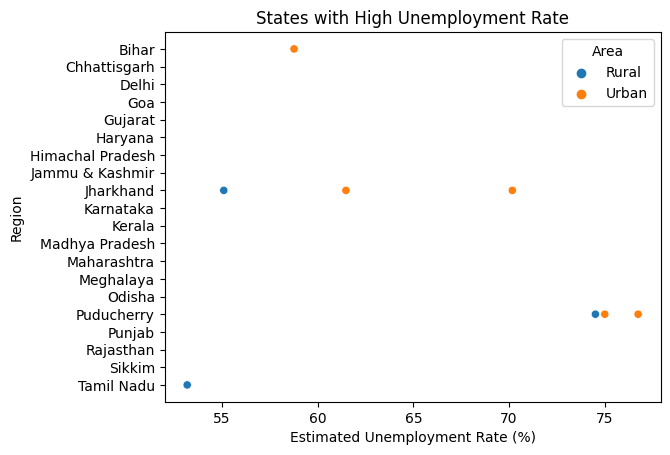

In [ ]:
plt.title('States with High Unemployment Rate')
df1=df[df['Estimated Unemployment Rate (%)']>50]
sns.scatterplot(y=df['Region'],x=df1['Estimated Unemployment Rate (%)'],hue=df['Area'])

In [ ]:
df[df['Estimated Unemployment Rate (%)']>40].Area.value_counts()

Urban    10
Rural     9
Name: Area, dtype: int64

States with High Estimated Labour Participation Rate

In [ ]:
df[df['Estimated Labour Participation Rate (%)']>60].Region.value_counts()

Tripura      17
Meghalaya    12
Telangana    11
Name: Region, dtype: int64

In [ ]:
df[df['Estimated Employed']>7500000].Region.value_counts()

Maharashtra       28
Uttar Pradesh     28
West Bengal       28
Karnataka         27
Gujarat           26
Tamil Nadu        24
Andhra Pradesh    14
Bihar             14
Madhya Pradesh    14
Rajasthan         14
Telangana         14
Odisha            13
Assam             12
Jharkhand          4
Name: Region, dtype: int64

In [ ]:
df=df.drop(['month'],axis=1)
by_year=df.groupby(['year']).mean().round()
by_year.style.background_gradient(cmap='Blues_r')

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
year,,,
2019,9.000000,7429385.000000,44.000000
2020,14.000000,6970860.000000,41.000000


In [32]:
df2 = pd.read_csv("V:/practice files/Unemployment_Rate_upto_11_2020.csv")
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [36]:
import plotly.express as px
unemployment = df2[['Region', 'Region.1', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']]
unemployment = unemployment.groupby(['Region.1', 'Region'])[' Estimated Unemployment Rate (%)'].mean().reset_index()
fig = px.sunburst(unemployment, path=['Region.1', 'Region'], values=' Estimated Unemployment Rate (%)', title='Unemployment rate in each State and Region',height=850)
fig.show()